In [5]:
import os
import json
import matplotlib.pyplot as plt

In [2]:
data = {}
with open('/home/custom_dataset/image_paths.txt') as f:
    lines = f.readlines()
    for line in lines:
        path = line.strip()
        classname = path.split('/')[-3]
        if classname not in data:
            data[classname] = []
        data[classname].append(path)

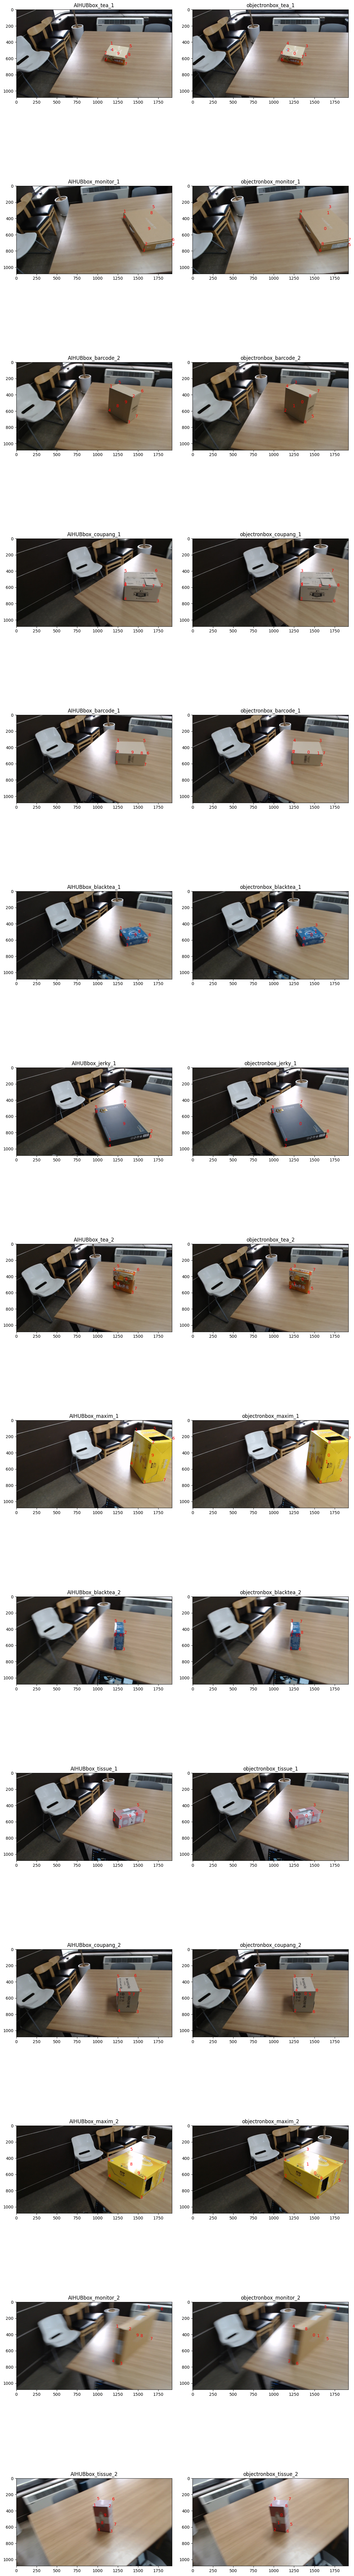

In [ ]:
fig, axes = plt.subplots(len(data), 2, figsize=(12, 6*len(data)))

for j, classname in enumerate(data):
    imgpath = data[classname][0]
    labelpath = imgpath.replace('jpg', 'json')
    # print(imgpath)
    # print(labelpath)
    with open(labelpath) as f:
        ann = json.load(f)
        xy_dict = ann['labelingInfo'][0]["3DBox"]["location"][0]
        corner_order = [9,8,4,5,1,7,3,6,2]
        label = [[int(xy_dict[f"x{i}"]), int(xy_dict[f"y{i}"])] for i in corner_order]  
    # print(label)
    img = plt.imread(imgpath)

    axes[j, 0].imshow(img)
    for i, (x, y) in zip(corner_order, label):
        axes[j, 0].text(x, y, f"{i}", color='r')
    axes[j, 0].set_title(f"AIHUB {classname}")

    axes[j, 1].imshow(img)
    for i, (x, y) in enumerate(label):
        axes[j, 1].text(x, y, f"{i}", color='r')
    axes[j, 1].set_title(f"objectron {classname}")

plt.tight_layout()